# Домашнее задание 6

(прислать до 02:00 24.03.2020)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1 (17 pts)

_1._ (6 pts) Реализуйте метод Левенберга-Марквардта

_2._ (2 pts) Сгенерируйте синтетические данные для решения задачи определения местоположения по расстояниям до известных объектов. То есть, Вам надо определить текущее положение человека $x$ по известным расстояниям $\rho_i$ до каждого из $N$ объектов с известными координатами $y_i$. Такая задача может быть записана следующим образом

$$
\min_x \sum_{i=1}^N (\|x - y_i\|^2_2 - \rho_i)^2
$$

Является ли эта задача выпуклой и почему?

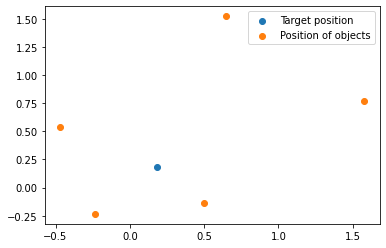

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
np.random.seed(42)
# We consider objects in plane for simplicity. In 3D you can use the same approach
n = 2
# Number of objects
m = 5
# Coordinates of the objects
y = np.random.randn(m, n)
# Ground-truth target position
xtrue = np.random.rand(1, n)
# Distances between ground-truth position and known objects
l2_distances = np.sum((y - xtrue)**2, axis=1)

plt.scatter(xtrue[0, 0], xtrue[0, 1], label="Target position")
plt.scatter(y[:, 0], y[:, 1], label="Position of objects")
plt.legend()

In [0]:
def levenberg_marquardt(f, jac, x, lam, rho_min, rho_max, tol, num_iter = 1000):

    n = x.shape[0]
    num = 0

    while True:

        J = Jac(x)

        F = f(x)

        while True:


            h = np.linalg.solve(J.T.dot(J) + lam * np.eye(n), -J.T.dot(F))
            num +=1
            if num> num_iter:
              return 0
            alpha = 0.1
            x_next = x + alpha * h
            F_next = f(x_next)
            if np.linalg.norm(F_next) < np.linalg.norm(F):

                lam = rho_min * lam
                x = x_next

                break
            else:

                lam = lam * rho_max

        if np.linalg.norm(F) - np.linalg.norm(F_next) < tol:
            break
    return x

Задача выпукла:

Пусть $a_i = (x-y_i)$
Представим задачу ввиду: $F(x) = \sum\limits_{i=1}^N f_i(x) = \sum\limits_{i=1}^N(\|x-y_i\|_2^2-\rho_i)^2. \nabla f_i(x) = 4(a_i^Ta_i-\rho_i) a_i, \nabla^2 f_i(x) = 8a_ia_i^T(a_i^Ta_i-\rho_i)$.

$J^T(x) = [\nabla f_1(x), \dots, \nabla f_N(x)]$. 

Исходная функциия распадается в сумму выпуклых функций, следовательно, задача выпукла.

In [0]:
n = 20
# Number of objects
m = 30
# Coordinates of the objects
y = np.random.randn(m, n)
# Ground-truth target position
xtrue = np.random.rand(1, n)
# Distances between ground-truth position and known objects
l2_distances = np.sum((y - xtrue)**2, axis=1)
x = np.random.rand(n)

In [0]:
def f_i(x,i):
  return (np.linalg.norm(x-y[i])**2 - l2_distances[i])**2

def grad_f_i(x,i):

  return 4*((x-y[i]).T@(x-y[i])-l2_distances[i])*(x-y[i])

def hes_f_i(x,i):
  return 8*(x-y[i])[:,None]@(x-y[i])[:, None].T*((x-y[i])[:,None].T@(x-y[1])[:, None]- l2_distances[i])

In [0]:
def Jac(x):
  J=[grad_f_i(x, i) for i in range(m)]
  return np.array(J)

In [0]:
def f(x):
  return np.array([f_i(x,i) for i in range(m)])

_3._ (4 pts) Покажите, что Ваша реализация работает, решив с её помощью вышепоставленную задачу с использованием сгенерированных данных. Совпадает ли найденное решение с правильным ответом, по отношению к которому генерировались расстояния?  Сравните точность решения с работой [стандартного решателя](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) этой задачи из ```scipy.optimize```, не забудьте явно указать, что Вы хотите решить задачу методом Левенберга-Марквардта

_4._ (3 pts) Запустите Ваш метод для различных начальных приближений. Всегда ли метод сходится в одну и ту же точку? Почему? Нарисуйте линии уровня целевой функции с помощью функции ```plt.countourf``` или её аналогов. Пример использования можно посмотреть [тут](https://matplotlib.org/gallery/images_contours_and_fields/contourf_log.html#sphx-glr-gallery-images-contours-and-fields-contourf-log-py)

_5._ (2 pts) Проанализируйте численно, какое минимальное количество объектов $y_i$ необходимо для восстановления координат $x$?

In [0]:
from scipy import optimize

In [0]:
my_res = levenberg_marquardt(f,Jac,x,lam = 1, rho_min = 0.5, rho_max=0.2, tol = 1e-6)

In [0]:
res = optimize.root(f,x,method='lm', jac = Jac)

In [0]:
print('Error of scipy realization:{}, error of my realisation:{} '.format(np.linalg.norm(xtrue-res.x), np.linalg.norm(xtrue - my_res)))

Error of scipy realization:6.574550320776279e-09, error of my realisation:0.0005150022793560317 


In [0]:
c1 = np.random.rand(n)+100000
c2 = np.random.rand(n)-100000

print(levenberg_marquardt(f,Jac,c1,1,0.7,0.5, 1e-6))
print(levenberg_marquardt(f,Jac,c2,1,0.7,0.5, 1e-6))


[0.87255409 0.36781542 0.77670818 0.06228058 0.73312126 0.20925685
 0.23921094 0.18844339 0.5891902  0.59557805 0.50056185 0.40038121
 0.91320196 0.85405485 0.48738773 0.40240307 0.0486174  0.62068669
 0.06313785 0.27289637]
[0.87284368 0.36783743 0.7762755  0.06260986 0.73341609 0.20938891
 0.23974008 0.1881719  0.58993213 0.59558472 0.50055314 0.40026313
 0.91303665 0.85354058 0.48711287 0.40221731 0.04848659 0.62093252
 0.06278005 0.27294578]


Точки близки, но они разные.

In [0]:
n = 2
# Number of objects
m = 5
# Coordinates of the objects
y = np.random.randn(m, n)
# Ground-truth target position
xtrue = np.random.rand(1, n)
# Distances between ground-truth position and known objects
l2_distances = np.sum((y - xtrue)**2, axis=1)
x=np.random.rand(n)

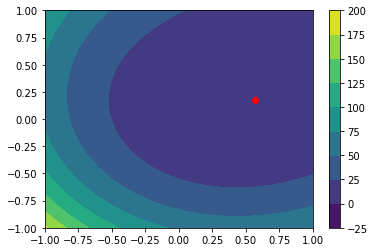

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm

N = 1000
x_ = np.linspace(-1, 1, N)
y_ = np.linspace(-1, 1, N)

X, Y = np.meshgrid(x_, y_)
res2 = optimize.root(f,x,method='lm', jac = Jac)

f_ = lambda X,Y: sum([((X - np.full_like(X,y[i,0]))**2
                       +(Y - np.full_like(X,y[i,1]))**2 - np.full_like(X,l2_distances[i]))**2 for i in range(m)])
z = f_(X,Y)
# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
#z = ma.masked_where(z <= 0, z)

fig, ax1 = plt.subplots()
cs = ax1.contourf(X,Y, z)
plt.scatter(xtrue[0][0],xtrue[0][1], c = 'red')
cbar = fig.colorbar(cs)

plt.show()

In [0]:
n = 150

m = 150
# Coordinates of the objects
y = np.random.randn(m, n)
# Ground-truth target position
xtrue = np.random.rand(1, n)
# Distances between ground-truth position and known objects
l2_distances = np.sum((y - xtrue)**2, axis=1)
x = np.random.rand(n)


In [0]:
my_res = levenberg_marquardt(f,Jac,x,lam = 1, rho_min = 0.5, rho_max=0.2, tol = 1e-6)

In [0]:
np.linalg.norm(my_res - xtrue)

0.060619900191999844

При $m=n$ метод сходится, при $m<n$ метод не сходится.